In [8]:
import numpy as np


In [9]:
def cost_function(y_true, y_pred):
    return (y_true - y_pred) ** 2


In [10]:
def initialize_weights(input_dim):
    return np.random.randn(input_dim)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(X, weights, bias):
    return sigmoid(np.dot(X, weights) + bias)



In [11]:
def calculate_gradients(X, y, y_pred, weights):
    return -2 * np.dot(X.T, np.array(y - y_pred).reshape(-1,1)) * y_pred * (1 - y_pred)

def update_weights(weights, gradients, learning_rate):
    return weights - learning_rate * gradients

def train_neuron(X, y, learning_rate, num_epochs, batch_size=64):
    weights = initialize_weights(X.shape[1])
    cost_history = []
    for _ in range(num_epochs):
        epoch_cost = 0
        for batch_idx in range(0, X.shape[0], batch_size):
            try:
                batch = X[batch_idx:batch_idx+batch_size]
                y_batch = y[batch_idx:batch_idx+batch_size]
            except IndexError:
                batch = X[batch_idx:]
                y_batch = y[batch_idx:]
            y_pred = forward_pass(batch, weights, 1)
            cost = cost_function(y_batch, y_pred)
            cost = np.mean(cost)
            epoch_cost += cost
            gradients = calculate_gradients(batch, y_batch, y_pred, weights)
            gradients = np.mean(gradients, axis=1) # average over the batch
            weights = update_weights(weights, gradients, learning_rate)
        cost_history.append(epoch_cost/(X.shape[0]//batch_size))
    return weights, cost_history



In [12]:
from numpy import genfromtxt
my_data = genfromtxt('dataA.csv', delimiter=',')[1:]

(100,)


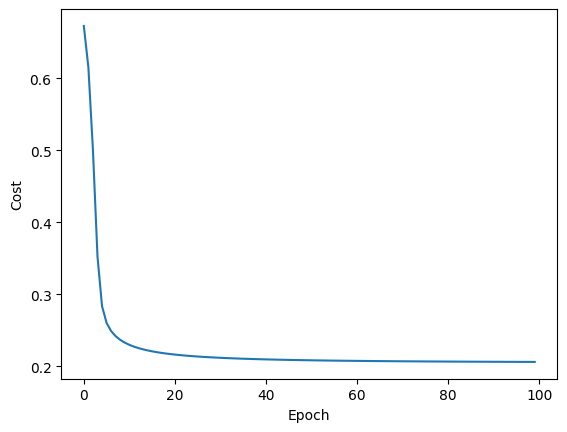

Accuracy: 0.7274549098196392


In [13]:
weights, history = train_neuron(my_data[:, :-1], my_data[:, -1], 0.01, 100)
print(np.array(history).shape)

import matplotlib.pyplot as plt
plt.plot(history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

def evaluate_neuron(X, y, trained_weights):
    y_pred = forward_pass(X, trained_weights, 1)
    y_pred = np.round(y_pred)
    return np.mean(y_pred == y)

print(f"Accuracy: {evaluate_neuron(my_data[:, :-1], my_data[:, -1], weights)}")


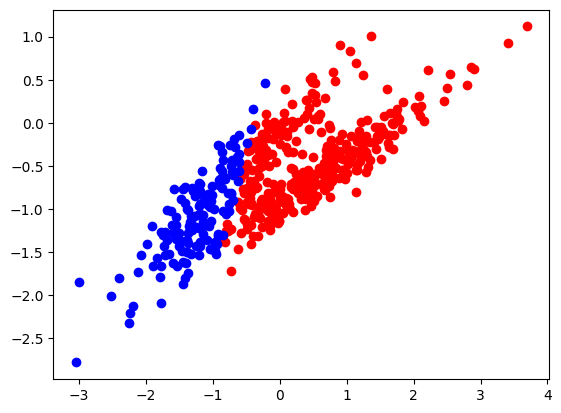

In [14]:
# plot the predicted labels on data
y_pred = forward_pass(my_data[:, :-1], weights, 1)
y_pred = np.round(y_pred)
my_signal = my_data[y_pred == 1]
my_noise = my_data[y_pred == 0]
plt.plot(my_signal[:, 0], my_signal[:, 1], 'ro')
plt.plot(my_noise[:, 0], my_noise[:, 1], 'bo')
plt.show()